In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import textwrap

In [2]:
df = pd.read_csv("tokens.csv")

In [3]:
df = df.set_index('Method')

In [4]:
df

,Package,Comment,Function
Method,,,
No pruning,9544,6991,10868
Tree Pruning: depth = 3,6525,3485,4638
Tree Pruning: depth = 2,4676,2696,3111
Tree Pruning: depth = 1,2846,1993,2001
Concept Level Pruning: [test AST depth = 3],3454,1901,2688
Concept Level Pruning: [test AST depth = 2],3097,1826,2127
Concept Level Pruning: [test AST depth = 1],2690,1751,1827


In [6]:
plt.rcParams['font.size'] = 40
sns.set_style('darkgrid')

In [43]:
def make_plot(df):
  fig, ax = plt.subplots(figsize = (40, 20))

  bottom = np.zeros(len(df))

  colors = ["#0a0b3e", "#0b1dbf", "#009ee1"]

  for i, col in enumerate(df.columns):
    ax.bar(
        df.index, df[col], bottom=bottom, label=col, color = colors[i])
    bottom += np.array(df[col])

  totals = df.sum(axis=1)
  y_offset = 200
  for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, round(total), ha='center',
            weight='bold')

  # Let's put the annotations inside the bars themselves by using a
  # negative offset.
  y_offset = -1000
  # For each patch (basically each rectangle within the bar), add a label.
  for bar in ax.patches:
    ax.text(
        # Put the text in the middle of each bar. get_x returns the start
        # so we add half the width to get to the middle.
        bar.get_x() + bar.get_width() / 2,
        # Vertically, add the height of the bar to the start of the bar,
        # along with the offset.
        bar.get_height() + bar.get_y() + y_offset,
        # This is actual value we'll show.
        round(bar.get_height()),
        # Center the labels and style them a bit.
        ha='center',
        color='w',
        weight='bold',
        size=30
    )
  ax.set_title('Number of Input Tokens per Prompt per Concept for JavaScript, using Python, C++ and Java as examples')
  ax.legend()

  labels = []
  for label in ax.get_xticklabels():
      text = label.get_text()
      labels.append(textwrap.fill(text, width=17,
                    break_long_words=False))
  ax.set_xticklabels(labels)
  plt.xlabel("Pruning Method")
  plt.ylabel("Number of input tokens")
  plt.tight_layout()


In [44]:
plt.rcParams['font.size'] = 40

/var/folders/j1/79x7lwgn5zx35mx7d2s71tq00000gn/T/ipykernel_47355/2239368026.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


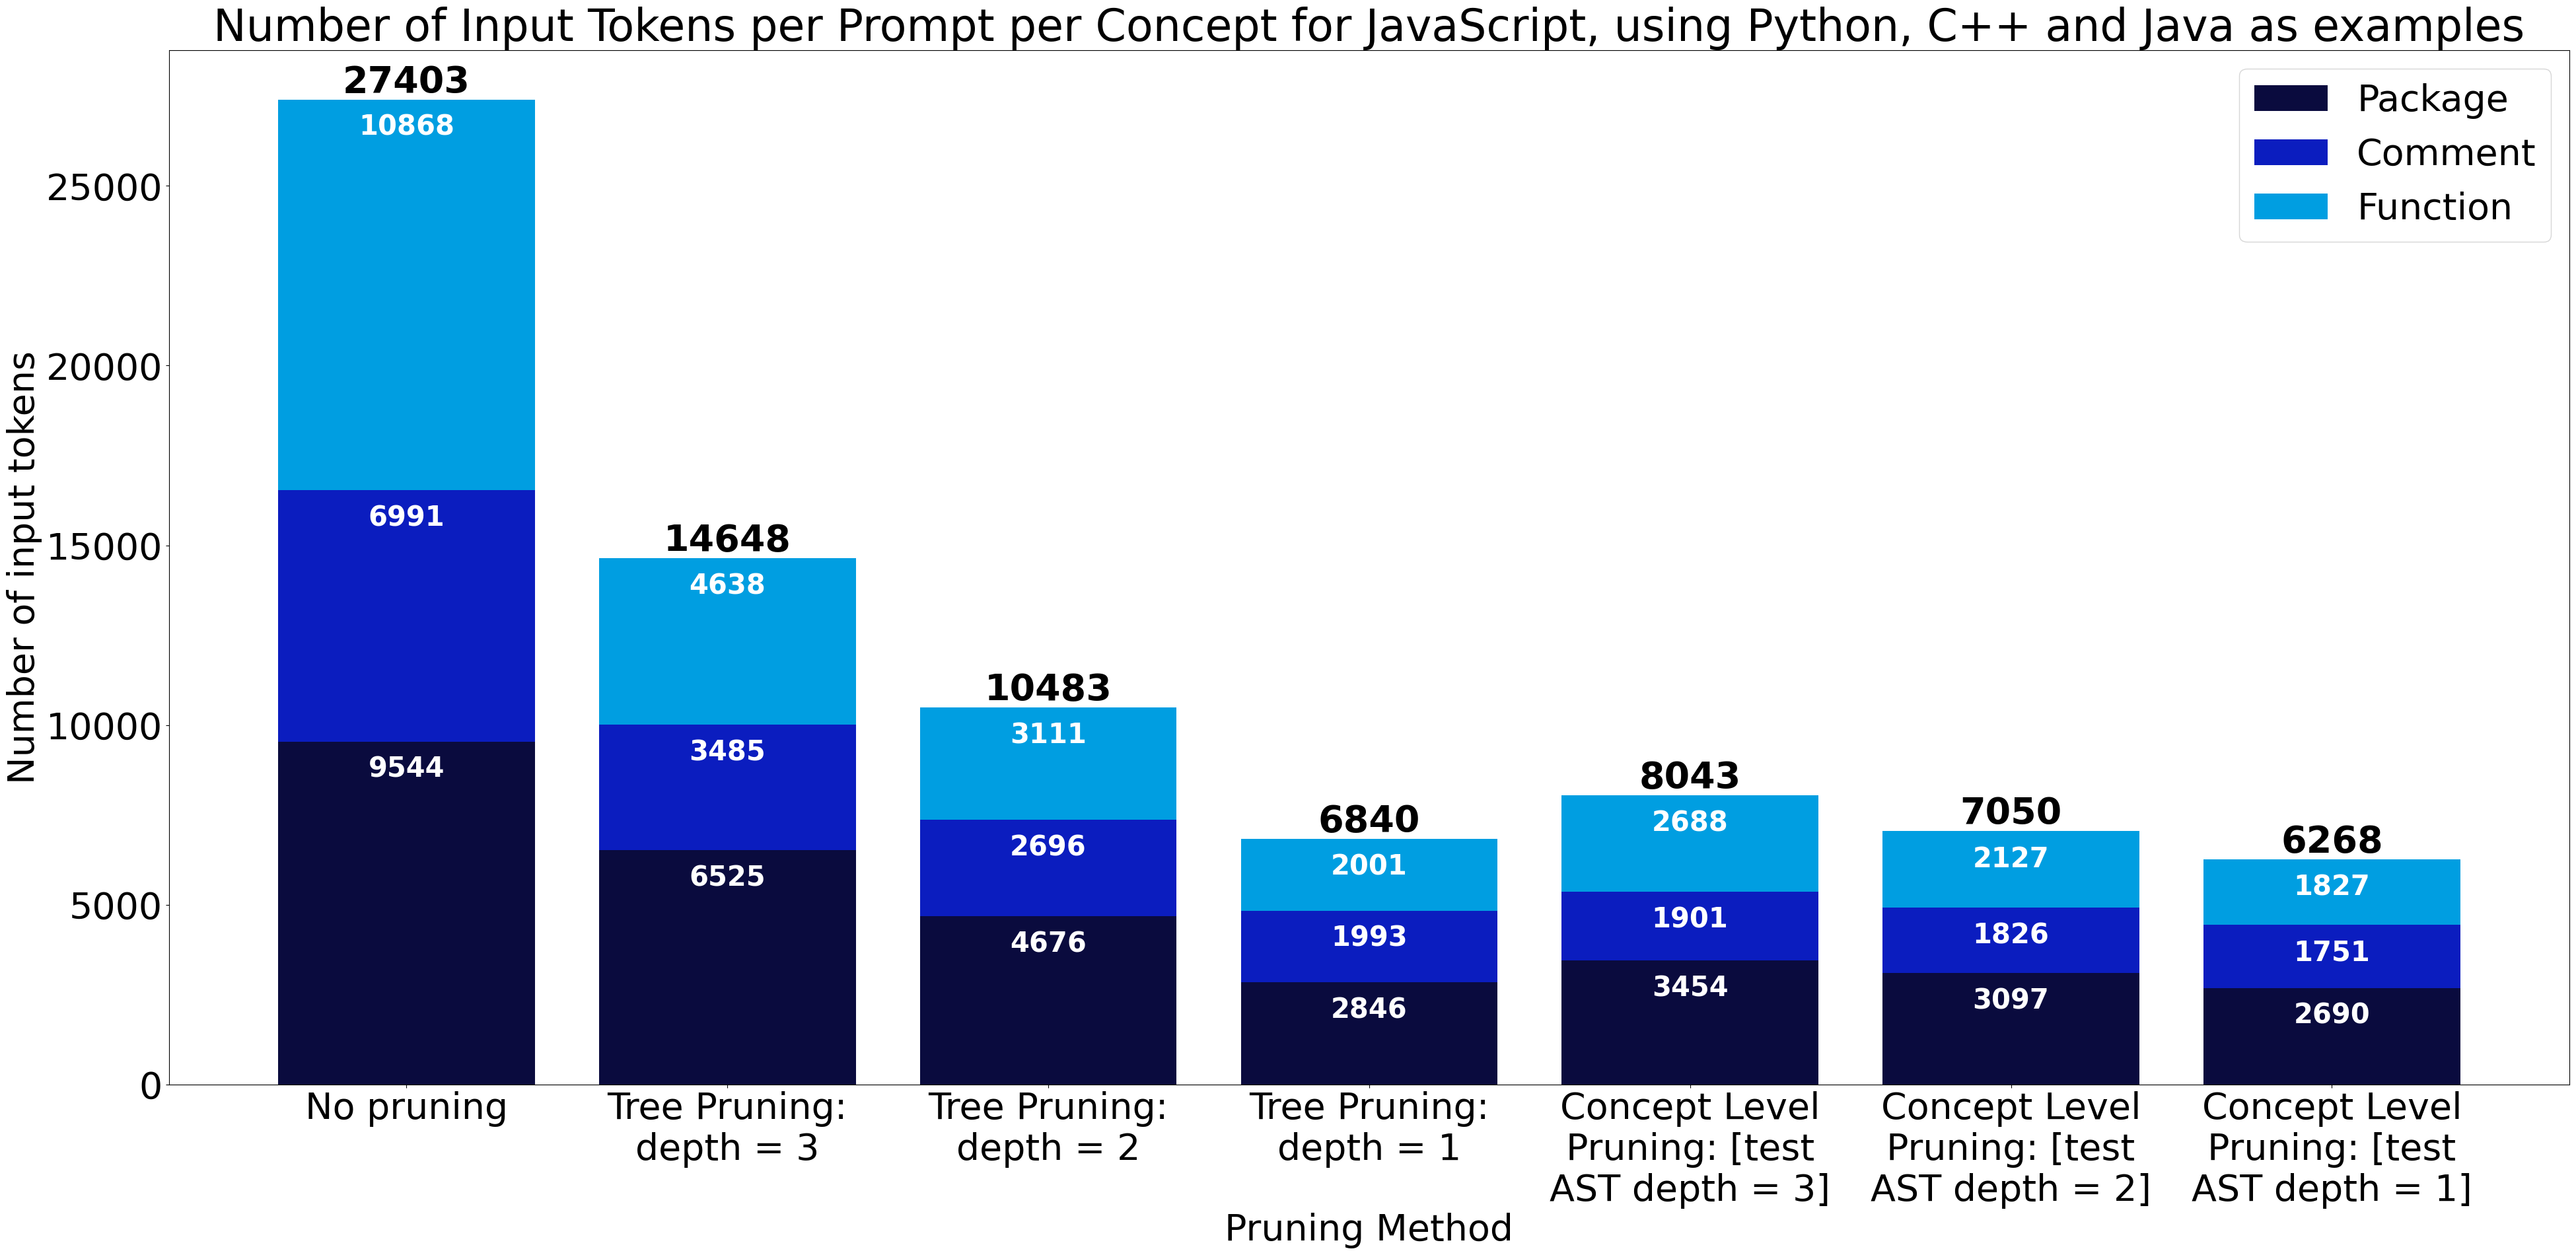

In [45]:
make_plot(df)